In [1]:
import numpy as np

In [2]:
print("うんこ")

うんこ


In [3]:
import numpy as np
print("Hello Mr Akahori")

Hello Mr Akahori


In [38]:
import numpy as np
import matplotlib.pyplot as plt
def generate_path(S0,T,r,vol,N,M):
    dt = T/M
    w = np.cumsum(np.reshape(np.random.standard_normal(N:M),(N,M)),1)*(dt**0.5)
    t = np.cumsum(np.ones((N,M)),1)*dt
    return S0*np.exp((r-0.5*vol**2)*t + vol*w)
if __name__ == "__main__":
    S0 = 100.0
    T = 3.0
    R = 0.01
    VOL = 0.2
    N = 50
    M = 200
    x = generate_path(S0, T, R, VOL, N, M)
    plt.plot(x.T)
    plt.show()
    

SyntaxError: invalid syntax (<ipython-input-38-e51f0f767fb5>, line 5)

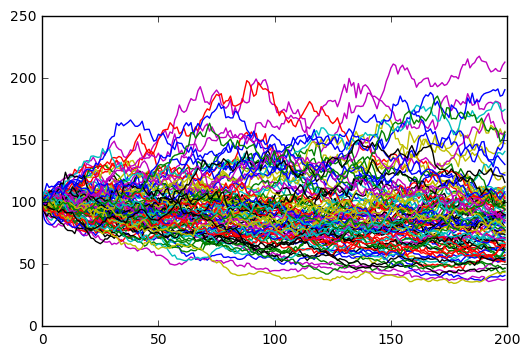

In [22]:
import numpy as np
import matplotlib.pyplot as plt

#株価の確率微分方程式に従うサンプルパスを生成
#dS/S = r * dt + vol * dW_t
def generate_path(S0, T, r, vol, N, M):
    dt = T/M
    w = np.cumsum(np.reshape(np.random.standard_normal(N*M), (N,M)), 1) * (dt**0.5)
    t = np.cumsum(np.ones((N,M)), 1)*dt   
    return S0 * np.exp((r-0.5*vol**2)*t + vol*w)

if __name__ == "__main__":
    #株価・満期・瞬間金利・ボラティリティ
    S0  = 100.0
    T   = 3.0
    R   = 0.01
    VOL = 0.2
    #パス数・時間刻み数
    N = 50
    M = 200
    #パスの生成＆描画
    x = generate_path(S0, T, R, VOL, N, M)
    plt.plot(x.T)
    plt.show()

In [14]:
import math

def binomial_tree(u, d, S0, n):
    result = []
    for element in range(1, n + 2):
        temparray = []
        for number in range(element - 1, -1, -1):
            u_power = number
            d_power = element - 1 - number
            temparray.append(u ** u_power * d ** d_power * S0)
        result.append(temparray)
    return result

def ncr(n, r):
    return math.factorial(n)/math.factorial(r)/math.factorial(n-r)

#def price_tree(btree, n, strike):
#    result = []


voltly = 0.3
T = 0.25
n = 15
u = math.exp(voltly*math.sqrt(T/n))
d = 1.0/u
S0 = 100
r = 0.02
c = 0.01
Rn = math.exp(r*T/n)
strike = 110

p = (math.exp((r-c)*T/n) - d) / (u - d)

q = 1 - p

binomial_arr = binomial_tree(u, d, S0, n)

l = [max(binomial_arr[n][i] - strike, 0) for i in range(0, n+1)]

coeff = [ncr(n, number) for number in range(0, n+1)]

price = 0
for number in range(0, n+1):
    price = price + coeff[number]*l[number]*p**(n-number)*q**(number)

price = price/(Rn**n)


print("price of call option", price)


price of call option 2.6040771329665597


In [5]:
x = 5 + 2 - 3 * 2
x

1

In [61]:
10*np.exp(-0.9) + 1.5

5.5656965974059913

In [6]:
5/2

2.5

In [7]:
2 **3

8

In [8]:
(3+2j) ** (2+3j)

(0.6817665190890336-2.1207457766159625j)

In [9]:
round(3.49)

3

In [10]:
import math
math.ceil(3.49)

4

In [18]:
x = 5

if x < 3 :
    y = -1
    z = 5
elif x > 5 :
    y = 1
    z = 11
else :
    y = 0
    z = 10
    print(x, y, z)
    

5 0 10


In [20]:
u, v, x, y = 0, 0, 100, 30
while x > y :
    u = u + y
    x = x - y
    if x < y + 2 :
        v = v + x 
        x = 0
    else :
        v = v + y + 2
        x = x - y - 2
print(u,v)

60 40


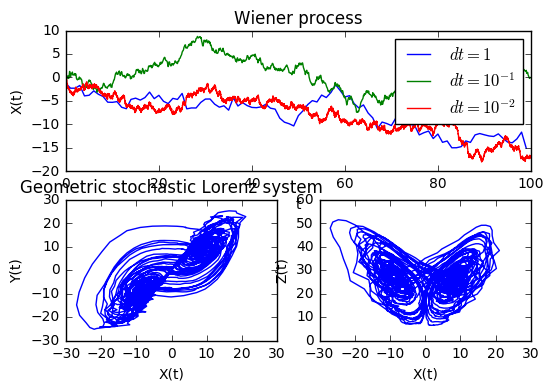

In [31]:


import numpy as np
import pylab as pl

__author__ = 'Lampros Mountrakis'
__version__ = '0.1b'

randn = np.random.randn


def solve_sde(alfa=None, beta=None, X0=None, dt=1.0, N=100, t0=0.0, DW=None):
    """
            Kloeden - Numerical Solution of stochastic differential
            equations (Springer 1992)  page XXX.
            Strong order 1.0 Runge Kutta scheme.
            http://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_method_%28SDE%29
            dX = a(X,t)*dt + b(X, t)*dW
    Syntax:
    ----------
    solve_sde(alfa=None, beta=None, X0=None, dt=None, N=100, t0=0, DW=None)
    Parameters:
    ----------
        alfa  : a lambda function with two arguments, the X state and the time
                defines the differential equation.
        beta  : a lambda function with two arguments, the X state and the time
                defines the stochastic part of the SDE.
        X0    : Initial conditions of the SDE. Mandatory for SDEs
                with variables > 1 (default: gaussian np.random)
        dt    : The timestep of the solution
                (default: 1)
        N     : The number of timesteps (defines the length of the timeseries)
                (default: 100)
        t0    : The initial time of the solution
                (default: 0)
        DW    : The Wiener function in lambda notation
                (default: gaussian np.random number generator, \
                    [lambda Y, dt: randn(len(X0)) * np.sqrt(dt)] )
    Examples:
    ----------
    == Simple Wiener Process:
    dX = 0 + 1*dW
    alfa = lambda X,t: 0
    beta = lambda X,t: 1
    t, Y = solve_sde(alfa=alfa, beta=beta, dt=1, N=1000)
    == Stochastic Lorenz Equation:
    dX = s (Y - X) + Y * dW1
    dY = (r X - Y - X*Z) + dW2
    dZ = (X*Y - b Z)  + dW3
    xL = lambda X, t: 10.0 * (X[1] - X[0])  ;
    yL = lambda X, t: 28.0 * X[0] - X[1] - X[0] * X[2] ;
    zL = lambda X, t: X[0] * X[1] - 8.0/3.0 * X[2] ;
    alfa = lambda X, t: np.array( [xL(X,t), yL(X,t), zL(X,t)] );
    beta = lambda X, t: np.array( [     X[1],      1,      1] );
    X0 = [3.4, -1.3, 28.3];
    t, Y = solve_sde(alfa=alfa, beta=beta, X0=X0, dt=0.01, N=10000)
"""
    if alfa is None or beta is None:
        print ("Error: SDE not defined.")
        return
    X0 = randn(np.array(alfa(0, 0)).shape or 1) if X0 is None else np.array(X0)
    DW = (lambda Y, dt: randn(len(X0)) * np.sqrt(dt)) if DW is None else DW
    Y, ti = np.zeros((N, len(X0))), np.arange(N)*dt + t0
    Y[0, :], Dn, Wn = X0, dt, 1

    for n in range(N-1):
        t = ti[n]
        a, b, DWn = alfa(Y[n, :], t), beta(Y[n, :], t), DW(Y[n, :], dt)
        # print Y[n,:]
        Y[n+1, :] = Y[n, :] + a*Dn + b*DWn*Wn + \
                    0.5*(beta(Y[n, :] + b*np.sqrt(Dn), t) - b) * \
                    (DWn**2.0 - Dn)/np.sqrt(Dn)
    return ti, Y


if __name__ == '__main__':
    pl.subplot(211)  # Simple Wiener Process
    alfa_wp = lambda X, t: 0
    beta_wp = lambda X, t: 1
    tWP1, YWP1 = solve_sde(alfa=alfa_wp, beta=beta_wp, dt=1, N=100)
    pl.plot(tWP1, YWP1[:, 0], label='$dt=1$')
    tWP2, YWP2 = solve_sde(alfa=alfa_wp, beta=beta_wp, dt=.1, N=1000)
    pl.plot(tWP2, YWP2[:, 0], label='$dt=10^{-1}$')
    tWP3, YWP3 = solve_sde(alfa=alfa_wp, beta=beta_wp, dt=.01, N=10000)
    pl.plot(tWP3, YWP3[:, 0], label='$dt=10^{-2}$')
    pl.title('Wiener process')
    pl.xlabel('t')
    pl.ylabel('X(t)')
    pl.legend(loc='best')
    pl.subplot(212)  # Stochastic Lorenz Equation:
    xL = lambda Y, t: 10.0 * (Y[1] - Y[0])
    yL = lambda Y, t: 28.0 * Y[0] - Y[1] - Y[0] * Y[2]
    zL = lambda Y, t: Y[0] * Y[1] - 8.0/3.0 * Y[2]
    alfa_sl = lambda Y, t: np.array([xL(Y, t), yL(Y, t), zL(Y, t)])
    beta_sl = lambda Y, t: np.array([0.5*Y[1], 1, 1])
    Y0 = [3.4, -1.3, 28.3]
    tSLE, YSLE = solve_sde(alfa=alfa_sl, beta=beta_sl, X0=Y0, dt=0.01, N=5000)
    # pl.plot(t, Y[:,0], label='X(t)')
    # pl.plot(t, Y[:,1], label='Y(t)')
    # pl.plot(t, Y[:,2], label='Z(t)')
    pl.subplot(223)
    pl.plot(YSLE[:, 0], YSLE[:, 1])
    pl.xlabel('X(t)')
    pl.ylabel('Y(t)')
    
    pl.title('Geometric stochastic Lorenz system')
    pl.subplot(224)
    pl.plot(YSLE[:, 0], YSLE[:, 2])
    pl.xlabel('X(t)')
    pl.ylabel('Z(t)')
    pl.show()

In [44]:
print("lmount/Simple-SDE-solver/solve_sde.py")

lmount/Simple-SDE-solver/solve_sde.py


In [23]:
#MILSTRONG Test strong convergence of Milstein
#
# SDE is  dX = r*X*(K-X) dt + beta*X dW,   X(0) = Xzero,
#       where r = 2, K = 1, beta = 0.25, Xzero = 0.5.
#
# Discretized Brownian path over [0,1] has dt = 2^(-11).
# Milstein uses timesteps 128*dt, 64*dt, 32*dt, 16*dt (also dt for reference).
#
# Examines strong convergence at T=1:  E | X_L - X_T |.
#
# Adapted from 
# Desmond J. Higham "An Algorithmic Introduction to Numerical Simulation of 
#                    Stochastic Differential Equations"
#
# http://www.caam.rice.edu/~cox/stoch/dhigham.pdf

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100)
r=2; K=1; beta=0.25; Xzero=0.5
T=1; N=2**11; dt=float(T)/N
M=500
R = [1, 16, 32, 64, 128]

dW = np.sqrt(dt)*np.random.randn(M,N)
Xmil = np.zeros((M,5))
for p in range(5):
    Dt = R[p]*dt; L=float(N)/R[p]
    Xtemp=Xzero*np.ones(M)
    for j in x*range(1,int(L)+1):
        Winc=np.sum(dW[:,range(R[p]*(j-1),R[p]*j)],axis=1)
        Xtemp += Dt*r*Xtemp*(K-Xtemp) + beta*Xtemp*Winc \
                 + 0.5*beta**2*Xtemp*(np.power(Winc,2)-Dt)
    Xmil[:,p] = Xtemp

Xref = Xmil[:,0]
Xerr = np.abs(Xmil[:,range(1,5)] - np.tile(Xref,[4,1]).T)
Dtvals = np.multiply(dt,R[1:5])

plt.loglog(Dtvals,np.mean(Xerr,0),'b*-')
plt.loglog(Dtvals,Dtvals,'r--')
plt.axis([1e-3, 1e-1, 1e-4, 1])
plt.xlabel('$\Delta t$'); plt.ylabel('Sample average of $|X(T)-X_L|$')
plt.title('milstrong.py',fontsize=16)

#### Least squares fit of error = C * Dt^q ####
A = np.column_stack((np.ones((4,1)), np.log(Dtvals)))
rhs=np.log(np.mean(Xerr,0))
sol = np.linalg.lstsq(A,rhs)[0]; q=sol[1]
resid=np.linalg.norm(np.dot(A,sol) - rhs)
print ("residual = ", resid)

plt.show()

NameError: name 'x' is not defined

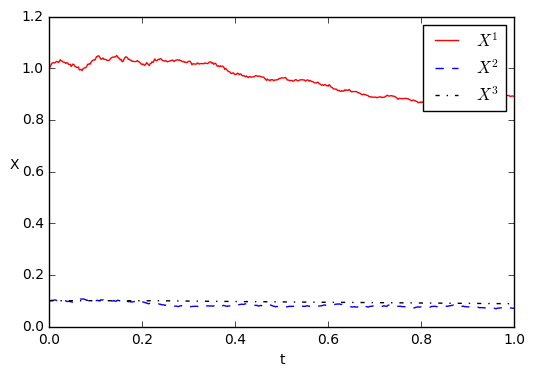

In [36]:
# Milstein method applied to a 3-dimensional SDE
#
# SDE:  dX(1) = X(1) X(2) dW(1),                     X(1)_0 = 1
#       dX(2) = -(X(2) - X(3)) dt + 0.3 X(2) dW(2),  X(2)_0 = 0.1
#       dX(3) = (X(2) - X(3)) dt,                    X(3)_0 = 0.1
#
# Discretized Brownian path over [0,1] has delta = 2^(-18)
# Milstein timestep is Delta = sqrt(delta)
# Substeps for double integral are of size delta
#
# Adapted from Higham, http://personal.strath.ac.uk/d.j.higham/mil.m

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(101)
T=1; Delta=2**(-9); delta=Delta**2
L=int(T/Delta); K=int(Delta/delta)

X1 = np.zeros(L+1); X2 = np.zeros(L+1); X3 = np.zeros(L+1)
Y2 = 0

X1[0]=1; X2[0]=0.1; X3[0]=0.1
for j in range(1,L+1):
    Y1=0; Winc1=0; Winc2=0
    for k in range(1,K+1):
        dW1 = np.sqrt(delta)*np.random.randn(1)
        dW2 = np.sqrt(delta)*np.random.randn(1)
        Y1 += Y2*dW1
        Y2 += dW2
        Winc1 += dW1
        Winc2 += dW2
    X1[j] = X1[j-1] + X1[j-1]*X2[j-1]*Winc1 + \
            X1[j-1]*(X2[j-1]**2)*0.5*(Winc1**2 - Delta) + \
            0.3*X1[j-1]*X2[j-1]*Y1
    X2[j] = X2[j-1] - (X2[j-1] - X3[j-1])*Delta + 0.3*X2[j-1]*Winc2 + \
            0.9*X2[j-1]*0.5*(X2[j-1] - X3[j-1])*Delta
    X3[j] = X3[j-1] + (X2[j-1] - X3[j-1])*Delta

plt.plot(np.linspace(0,T,L+1), X1, 'r-')
plt.plot(np.linspace(0,T,L+1), X2, 'b--')
plt.plot(np.linspace(0,T,L+1), X3, 'k-.')
plt.legend(("$X^1$", "$X^2$", "$X^3$"))
plt.xlabel('t'); plt.ylabel('X',rotation=0)
plt.show()

In [43]:
print("alu042/SDE-higham/milstein-3d.py")

alu042/SDE-higham/milstein-3d.py


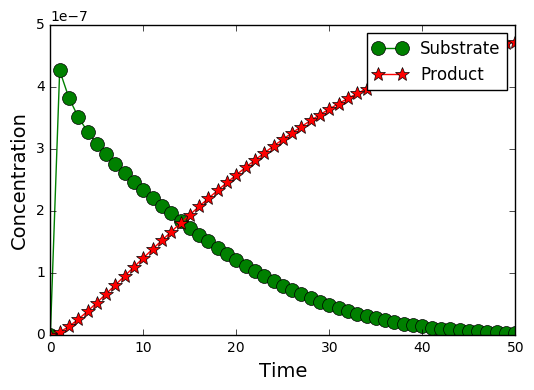

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

def mm_rre(t, y, k):
    yprime = np.zeros_like(y)
    yprime[0] = -k[0] * y[0] * y[1] + k[1] * y[2]
    yprime[1] = -k[0] * y[0] * y[1] + (k[1] + k[2]) * y[2]
    yprime[2] = k[0] * y[0] * y[1] - (k[1] + k[2]) * y[2]
    yprime[3] = k[2] * y[2]

    return yprime

tspan = np.array([0.0, 50.0])
yzero = np.array([5.0e-7, 2.0e-7, 0.0, 0.0])
k = np.array([1.0e6, 1.0e-4, 0.1])
r = ode(mm_rre).set_integrator('vode', method='bdf', order=15)
r.set_f_params(k)
r.set_initial_value(yzero, tspan[0])
dt = 1.0
y = np.zeros((4,int(tspan[1]/dt)+1))
k = 1
while r.successful() and r.t < tspan[1]:
    r.integrate(r.t + dt)
    y[:,k] = r.y
    k+=1
    
tvals = np.linspace(tspan[0], tspan[1], int(tspan[1]/dt)+1)
plt.plot(tvals, y[0, :], 'go-', markersize=10, label='Substrate')
plt.plot(tvals, y[3, :], 'r*-', markersize=10, label='Product')
plt.xlabel("Time", size=14)
plt.ylabel("Concentration", size=14)
plt.legend(fontsize=12)
plt.show()

In [46]:
print("IanHawke/HighamSDEs/rre_plot.py")

IanHawke/HighamSDEs/rre_plot.py


In [ ]:
import numpy as np
import math

def




In [3]:
error_em = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0];
fin_value =[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0];

m = [100,200,300,400,500,1000,2000,3000,4000,5000,10000,20000,30000,40000,50000,100000,200000,300000,400000,500000];

%Declare constants:
miu = 0.05; SK = 1.05; alpha = 2; beta = 0.1; theta = 0.09; x_1 = 1; x_2 = 0.09; true_result = 1.0512;
mc = 1e5; %Monte carlo

for l = 1:20
    n = m(l);
    Y_1_value = zeros(1,mc); Y_2_value = zeros(1,mc); Y_3_value = zeros(1,mc); Payoff_value = zeros(1,mc);
    for p = 1:mc 
        %Step no and T
        T = 1; dt = 1/n; 
        %Random normal arrays:
        Z_1 = randn(1,n); Z_2 = randn(1,n);
        %Brownean arrays:
        B_1 = zeros(1,n); B_2 = zeros(1,n);

        for k = 2:n %Create brownean paths
            B_1(1,k) = B_1(1,k-1) + sqrt(dt) * Z_1(1,k-1);
            B_2(1,k) = B_2(1,k-1) + sqrt(dt) * Z_2(1,k-1);
        end

        %Y1, Y2, Y3 arrays:
        Y_1 = zeros(1,n); Y_2 = zeros(1,n); Y_3 = zeros(1,n); Payoff = zeros(1,n);

        %Calculate Y1, Y2, Y3:
        Y_1(1,1) = x_1; Y_2(1,1) = x_2; Y_3(1,1) = x_1; %ICs

        for k = 2:n
            dw_1 = B_1(1,k) - B_1(1,k-1);
            dw_2 = B_2(1,k) - B_2(1,k-1);
            Y_1(1,k) = Y_1(1,k-1) + miu*Y_1(1,k-1)*dt + Y_1(1,k-1)*sqrt(Y_2(1,k-1))*dw_1;
            Y_2(1,k) = Y_2(1,k-1) + alpha*(theta - Y_2(1,k-1))*dt + beta*sqrt(Y_2(1,k-1))*dw_2;
            Y_3(1,k) = Y_3(1,k-1) + Y_1(1,k-1)*dt;
            Payoff(1,k) = max(Y_3(1,k)/k-SK,0);
        end
        
        Y_1_value(1,p) = Y_1(1,n);
        Y_2_value(1,p) = Y_2(1,n);
        Y_3_value(1,p) = Y_3(1,n);
        Payoff_value(1,p) = Payoff(1,n);
    end
    
    fin_value(l) = mean(Y_1_value);
    error_em(l) = abs(mean(Y_1_value) - true_result);
end


plot(fin_value)



SyntaxError: invalid syntax (<ipython-input-3-a02ac48bea5e>, line 8)

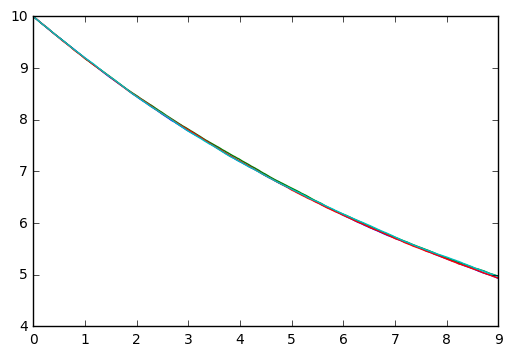

In [38]:
import numpy as np
import matplotlib.pyplot as plt

num_sims = 4
N        = 10000

y_init = 10
t_init = 0
t_end  = 9

c_theta = 0.1
c_mu    = 1.5
c_sigma = 0.01

def mu(y, t): 
    return c_theta * (c_mu - y)
        
def sigma(y, t): 
    return c_sigma

dt   = float(t_end - t_init) / N
dW   = lambda dt: np.random.normal(loc = 0.0, scale = np.sqrt(dt))

t    = np.arange(t_init, t_end, dt)
y    = np.zeros(N)
y[0] = y_init

for i_sim in range(num_sims):
    for i in range(1, t.size):
        a = mu(y[i-1], (i-1) * dt)
        b = sigma(y[i-1], (i-1) * dt)
        y[i] = y[i-1] + a * dt + b * dW(dt)
    plt.plot(t, y)

plt.show()


In [10]:
10*np.exp(-0.9) + 1.5

5.5656965974059913

In [63]:
1/0.2*(1-np.exp(-1.8))

4.1735055588920673

In [11]:
8.5*np.exp(-0.9) + 1.5

4.9558421077950925

In [12]:
np.exp(1)

2.7182818284590451

In [13]:
1/0.2*(1-np.exp(-1.8))

4.1735055588920673

In [14]:
2*4.1735

8.347

In [15]:
4.9558*4.9558

24.55995364

In [16]:
sqrt(2*pi)

NameError: name 'sqrt' is not defined

In [18]:
math.pi
sqrt(2*pi)

NameError: name 'math' is not defined

In [36]:
(1/np.sqrt(2*3.1415))*np.sqrt(4.1735)*np.exp(-24.55995364/8.347)+4.9558*0.5

2.5208845198207062

In [19]:
np.exp(-24.55995364/8.347)

0.052740640601746866

In [26]:
1/(sqrt(6.283))

NameError: name 'sqrt' is not defined

In [23]:
2*3.1415

6.283

In [28]:
np.sqrt(6.283)

2.5065913109240605